In [386]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style='darkgrid', context='notebook', palette='deep') 
import matplotlib.style as style
style.use('fivethirtyeight')
import scipy
from scipy import stats
from scipy.stats import shapiro

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
import xgboost as xgb

from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from numpy import mean
from numpy import std

from matplotlib import pyplot

In [2]:
train= pd.read_csv('train.csv')
train_org= train.copy()
test= pd.read_csv('test.csv')
test_org= test.copy()

In [3]:
train.shape, test.shape

((550068, 12), (233599, 11))

In [4]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
len(train['Age'].unique())

7

In [6]:
for c in train.columns:
    length =len(train[c].unique())
    print('{} column has {} unique values'.format(c, length) )

User_ID column has 5891 unique values
Product_ID column has 3631 unique values
Gender column has 2 unique values
Age column has 7 unique values
Occupation column has 21 unique values
City_Category column has 3 unique values
Stay_In_Current_City_Years column has 5 unique values
Marital_Status column has 2 unique values
Product_Category_1 column has 20 unique values
Product_Category_2 column has 18 unique values
Product_Category_3 column has 16 unique values
Purchase column has 18105 unique values


In [7]:
# the only continuous variable is Purchase(target) variable,
# User_ID < length of dataset, therefore some users purchased more than one time, this variable can help us during EDA
# product_ID < length of dataset, therefore some products have been purchased multiple times, this feature can provide us 
# with useful insights
# the rest of variables are categories eventhough some of them are numerical variables, hence I'll treat them like categorical 
# variables during the EDA

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
# some variable data type might need to change during the EDA and Preprocessing
# Also there are number of missing values 

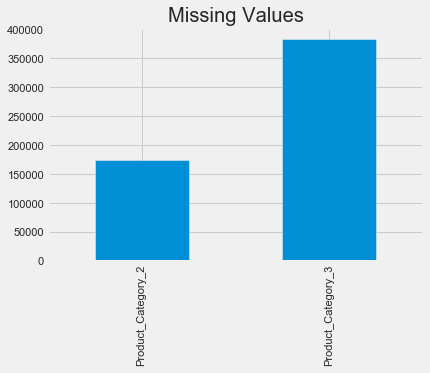

In [10]:
missing=train.isnull().sum()
missing= missing[missing>0]
missing.plot(kind='bar')
plt.title('Missing Values')
plt.show()

In [11]:
# to keep train set intact from any probable changes I'll create a copy of the train dataset and do further EDA on it
data= train.copy()

In [12]:
data.loc[data['Product_ID']=="P00000142", ['Product_Category_1', 'Product_Category_2', 'Product_Category_3'] ]

,Product_Category_1,Product_Category_2,Product_Category_3
293,3,4.0,5.0
1066,3,4.0,5.0
1073,3,4.0,5.0
1322,3,4.0,5.0
1910,3,4.0,5.0
...,...,...,...
543891,3,4.0,5.0
544175,3,4.0,5.0
544671,3,4.0,5.0
545284,3,4.0,5.0


In [13]:
# by looking at above table it's obvious that each specific Product_ID has specific values for each Product_category, hence
# it's reasonable to fill na values of Product_Category_2 and 3 features with zero

In [14]:
data= data.fillna(0)

In [15]:
data['Product_Category_3'].unique()

array([ 0., 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [16]:
# further investigation regarding missing values is required to understand what is the best approach for dealing with them

In [17]:
# for the sake of keeping train dataset intact I'll use the copy of that for EDA with the name of data

In [18]:
features= data.columns
target='Purchase'
for f in features:
    if f in ['Purchase', 'User_ID']:
        pass
    else:
        data[f]=data[f].astype('O')
#cat=[f for f in train.columns if len(train[f].unique())<int(22)]
#num=[f for f in train.columns if f not in cat]

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category_1          550068 non-null  object
 9   Product_Category_2          550068 non-null  object
 10  Product_Category_3          550068 non-null  object
 11  Purchase                    550068 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 50.4+ MB


## Univariate Analysis

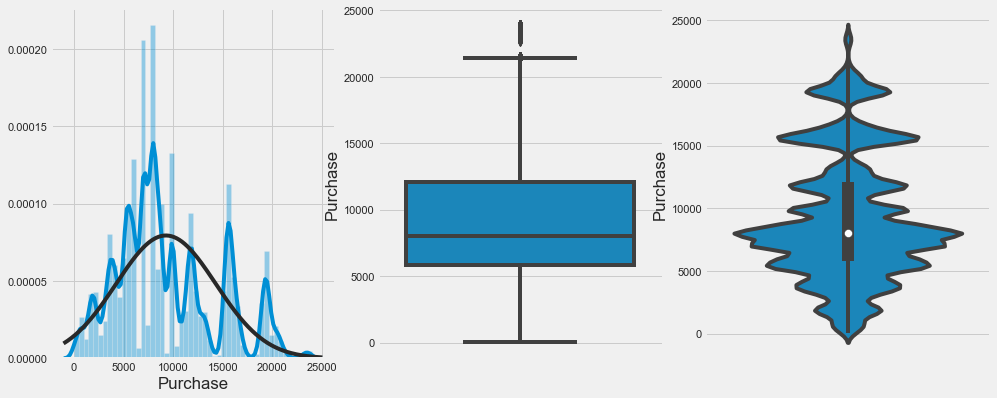

In [20]:
f, axs= plt.subplots(1,3, figsize=(15, 6), squeeze=False, gridspec_kw={'hspace': 0.15, 'wspace': 0.15})
axs=axs.flatten()
i=0
for feature in ['Purchase']:
    ax=axs[i]
    sns.distplot(train[feature], fit=stats.norm, ax=ax)
    i=i+1
    sns.boxplot(y=feature,data=train, ax=axs[i])
    i=i+1
    sns.violinplot(y=feature, data=train, ax=axs[i])
    i=i+1

In [21]:
stat, p = shapiro(data['Purchase'])
skewness =data['Purchase'].skew()
print('Statistics=%.3f, p=%.3f, skewness=%.2f' % (stat, p, skewness))
alpha=0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    

Statistics=0.953, p=0.000, skewness=0.60
Sample does not look Gaussian (reject H0)


In [22]:
# there are some outliers in the target variable
# distribution plot neither follows a smooth curve or is normal and it is positively skewed. 

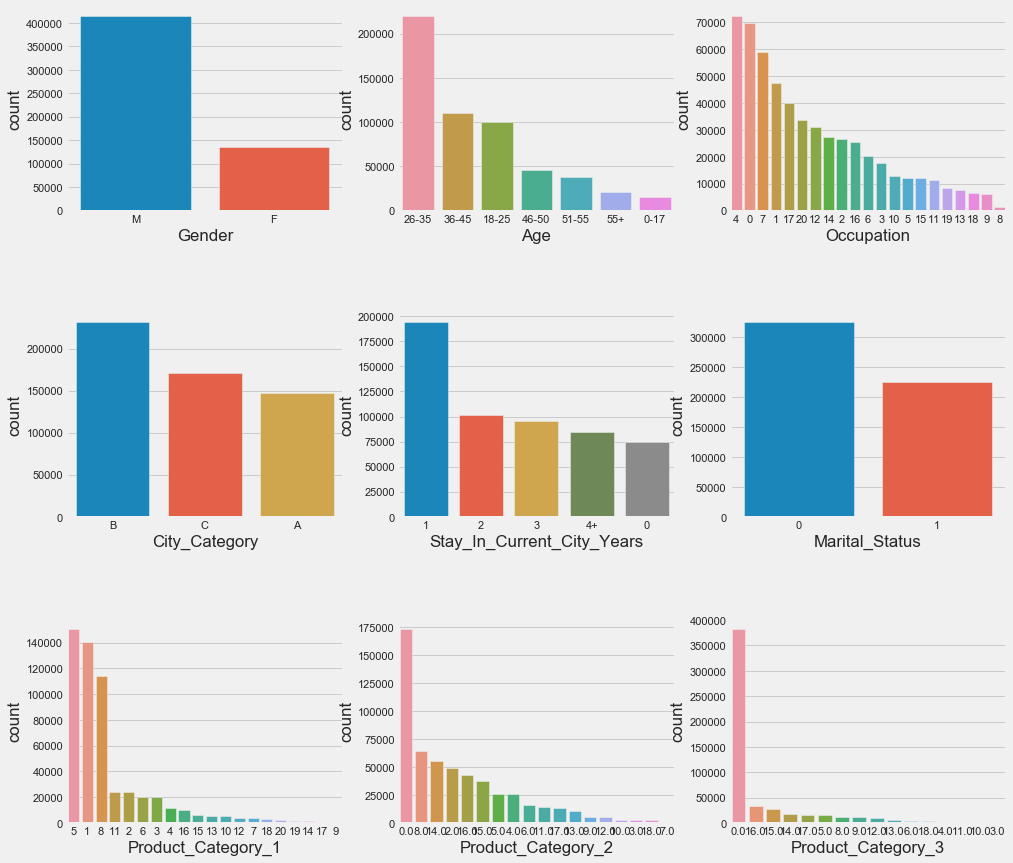

In [23]:
f, axs= plt.subplots(3, 3, figsize=(15, 14), squeeze=False, gridspec_kw={'hspace': 0.5, 'wspace': 0.2})
axs=axs.flatten()
for i, feature in enumerate(features[2:11]):
    
    ax=axs[i]
    sns.countplot(data[feature],order = data[feature].value_counts().index,  ax=ax)

In [24]:
# men do more shopping than women!
# Age group 26-35 significantly do more shopping than any other group
# People in Occupation 4 fillowed by 0 and 7 respectively do more shopping than others
# Citizens from city category B do more shopping than C and A
# those who setteled for the firs year in a city do more shoppings than others, however, new comers hold the lowest rank for shopping
# Singels do more shopping than married people
# the most popular items in each product category are respectively 5, 8, 16

([], <a list of 0 Text xticklabel objects>)

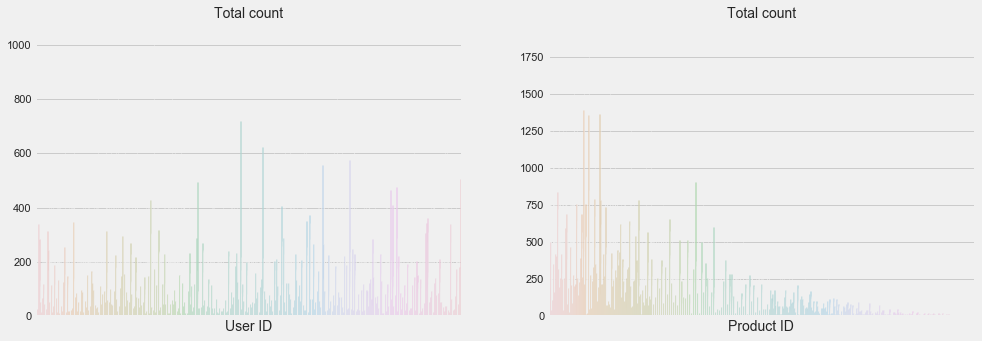

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot('User_ID',data=data,alpha = 0.8)
plt.xlabel('User ID',fontsize=14)
plt.ylabel('')
plt.title('Total count',fontsize=14)
plt.xticks([])
plt.subplot(122)
sns.countplot('Product_ID',data=data,alpha = 0.8)
plt.xlabel('Product ID',fontsize=14)
plt.ylabel('')
plt.title('Total count',fontsize=14)
plt.xticks([])

In [26]:
# it can be inferred that some users do shopping significantly more frequently than others
# also some product ids have been purchased more than others

## Bivariate Analysis

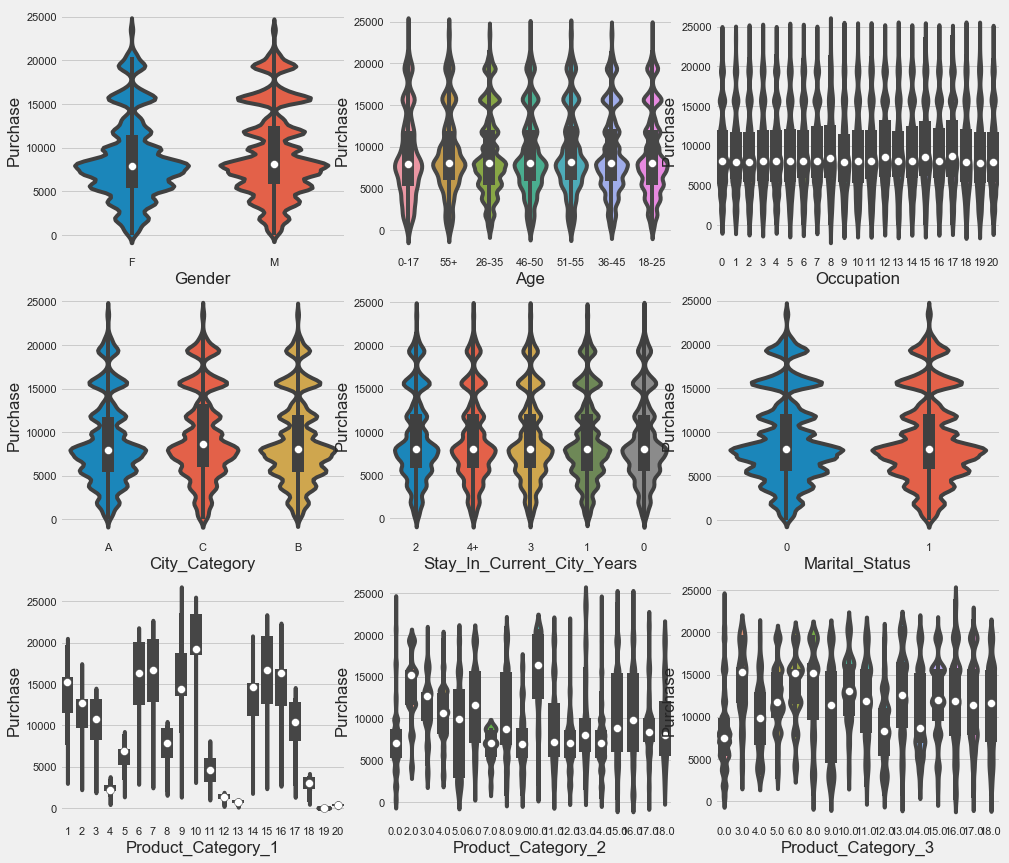

In [27]:
f, axs= plt.subplots(3,3, figsize=(15, 14), squeeze=False, gridspec_kw={'hspace': 0.15, 'wspace': 0.15})
axs=axs.flatten()
for i, feature in enumerate(features[2:11]):
    ax=axs[i]
    sns.violinplot(x=feature, y='Purchase', data=data, ax=axs[i])

In [28]:
# the average of Purchase for most variables is not significantly different, however, it demonstrates an interesting insight
# when comes to prodcut category, it seems different items have been purchased with different average price, hence product 
# attributes might play an important role in behavior of customers

In [29]:
uid_pc1_pch=data.groupby(['User_ID', 'Product_Category_1']).agg({'Purchase': np.mean}).reset_index()
uid_pc2_pch=data.groupby(['User_ID', 'Product_Category_2']).agg({'Purchase': np.mean}).reset_index()
uid_pc3_pch=data.groupby(['User_ID', 'Product_Category_3']).agg({'Purchase': np.mean}).reset_index()

<Figure size 1440x360 with 0 Axes>

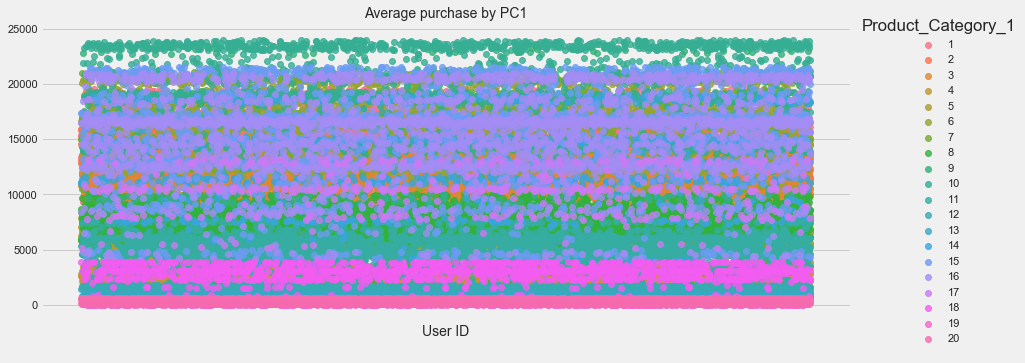

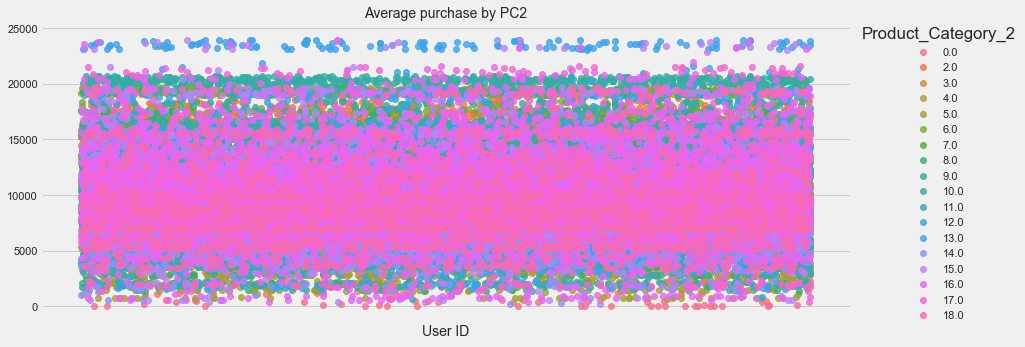

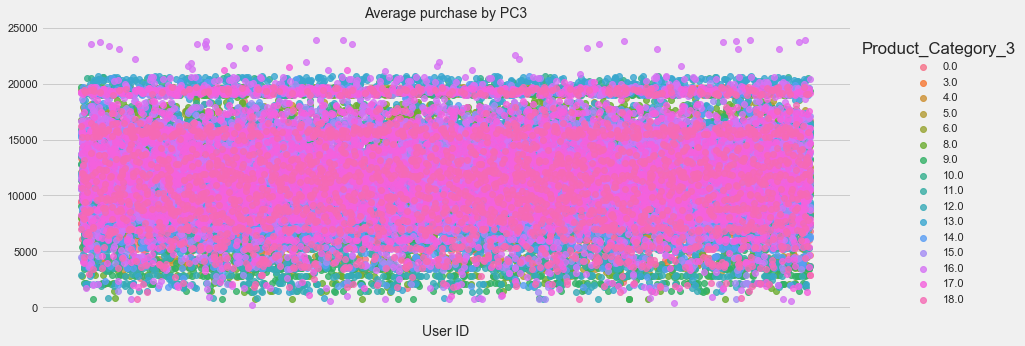

In [30]:
plt.figure(figsize=(20,5))

sns.lmplot('User_ID','Purchase', data=uid_pc1_pch ,fit_reg=False, hue='Product_Category_1', aspect=2.5)
plt.xticks([])
plt.xlabel('User ID',fontsize=14)
plt.ylabel('')
plt.title('Average purchase by PC1',fontsize=14)
plt.show()


sns.lmplot('User_ID','Purchase', data=uid_pc2_pch ,fit_reg=False, hue='Product_Category_2', aspect=2.5)
plt.xticks([])
plt.xlabel('User ID',fontsize=14)
plt.ylabel('')
plt.title('Average purchase by PC2',fontsize=14)
plt.show()


sns.lmplot('User_ID','Purchase', data=uid_pc3_pch ,fit_reg=False, hue='Product_Category_3', aspect=2.5)
plt.xticks([])
plt.xlabel('User ID',fontsize=14)
plt.ylabel('')
plt.title('Average purchase by PC3',fontsize=14)
plt.show()

In [31]:
pid_pc1_pch=data.groupby(['Product_ID', 'Product_Category_1']).agg({'Purchase': np.mean}).reset_index()
pid_pc2_pch=data.groupby(['Product_ID', 'Product_Category_2']).agg({'Purchase': np.mean}).reset_index()
pid_pc3_pch=data.groupby(['Product_ID', 'Product_Category_3']).agg({'Purchase': np.mean}).reset_index()

In [32]:
plt.figure(figsize=(20,5))

sns.lmplot('Product_ID','Purchase', data=pid_pc1_pch ,fit_reg=False, hue='Product_Category_1', aspect=2.5)
plt.xticks([])
plt.xlabel('Product ID',fontsize=14)
plt.ylabel('')
plt.title('Average purchase by PC1',fontsize=14)
plt.show()


sns.lmplot('Product_ID','Purchase', data=pid_pc2_pch ,fit_reg=False, hue='Product_Category_2', aspect=2.5)
plt.xticks([])
plt.xlabel('Product ID',fontsize=14)
plt.ylabel('')
plt.title('Average purchase by PC2',fontsize=14)
plt.show()


sns.lmplot('Product_ID','Purchase', data=pid_pc3_pch ,fit_reg=False, hue='Product_Category_3', aspect=2.5)
plt.xticks([])
plt.xlabel('Product ID',fontsize=14)
plt.ylabel('')
plt.title('Average purchase by PC3',fontsize=14)
plt.show()

KeyboardInterrupt: 

<Figure size 1440x360 with 0 Axes>

Error in callback <function flush_figures at 0x000002121148E318> (for post_execute):


KeyboardInterrupt: 

In [33]:
# it is obvious that Product_Category_1 is a good predictor, hence we can do further analysis on this feature

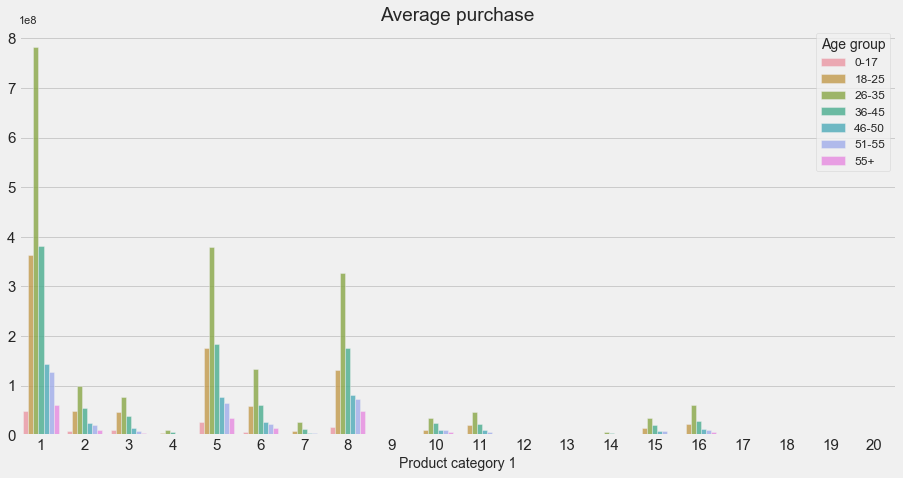

In [34]:
plt.figure(figsize=(14, 7))
pc1_age_pch= data.groupby(['Product_Category_1', 'Age']).agg({'Purchase':np.sum}).reset_index()
sns.barplot('Product_Category_1','Purchase',hue='Age',data=pc1_age_pch,alpha = 0.8)
plt.title('Average purchase',fontsize=19)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.legend(title='Age group',frameon=True,fontsize=12)
plt.tick_params(labelsize=15)

In [35]:
# as mentioned before products number 5, 1, and 8 are the most popular product and age group 26-35 has spent 
# the most for each category, this can be used when targeting an age group for marketing purpuses 

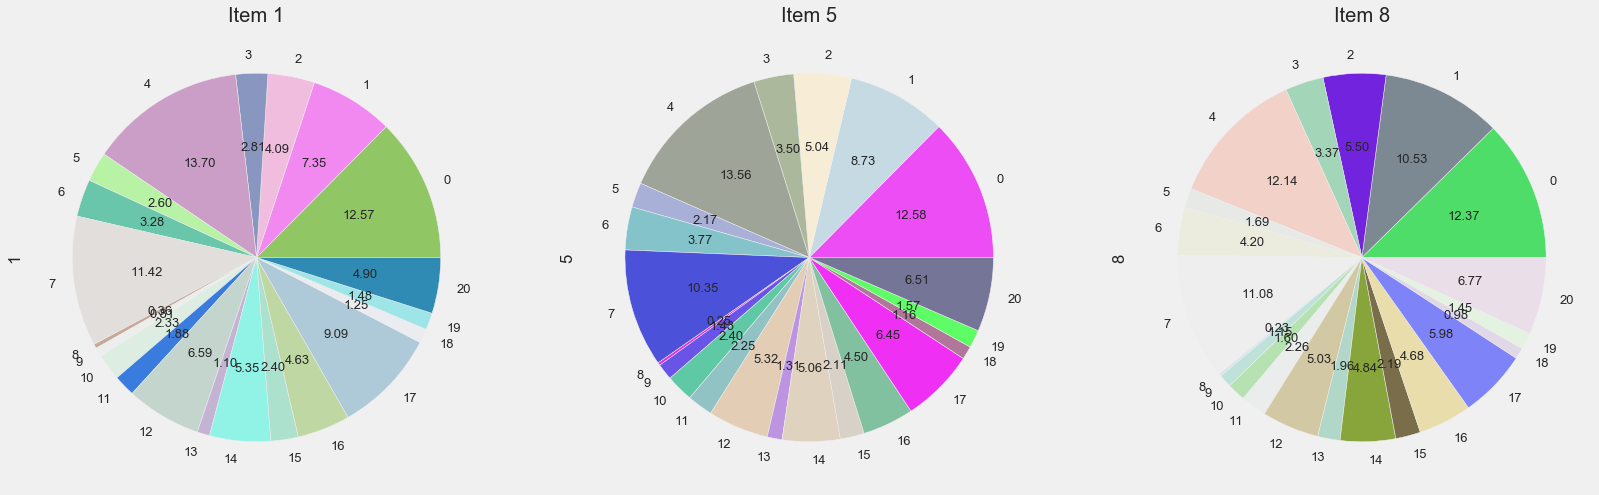

In [38]:
filtered_data= data.loc[(data['Product_Category_1']== 1)| (data['Product_Category_1']== 5)| (data['Product_Category_1']== 8)]
tab2=pd.crosstab( filtered_data['Occupation'], filtered_data['Product_Category_1'])

plt.figure(figsize=(25, 20))
plt.subplot(131)
plt.title('Item 1')
tab2.iloc[:,0].plot.pie(subplots=True, labels=tab2.index, fontsize=13, autopct='%.2f', colors = np.random.rand(200,4))
plt.subplot(132)
plt.title('Item 5')
tab2.iloc[:,1].plot.pie(subplots=True, labels=tab2.index, fontsize=13, autopct='%.2f', colors = np.random.rand(200,4))
plt.subplot(133)
plt.title('Item 8')
tab2.iloc[:,2].plot.pie(subplots=True, labels=tab2.index, fontsize=13, autopct='%.2f', colors = np.random.rand(200,4))

plt.show()


In [39]:
# by plotting pie charts for top 3 popular items in Product_Category_1 we observe that Occupation O, followed by 4, and 1 has
# made up more than 35 percent of each item, these insights can be useful for future marketing

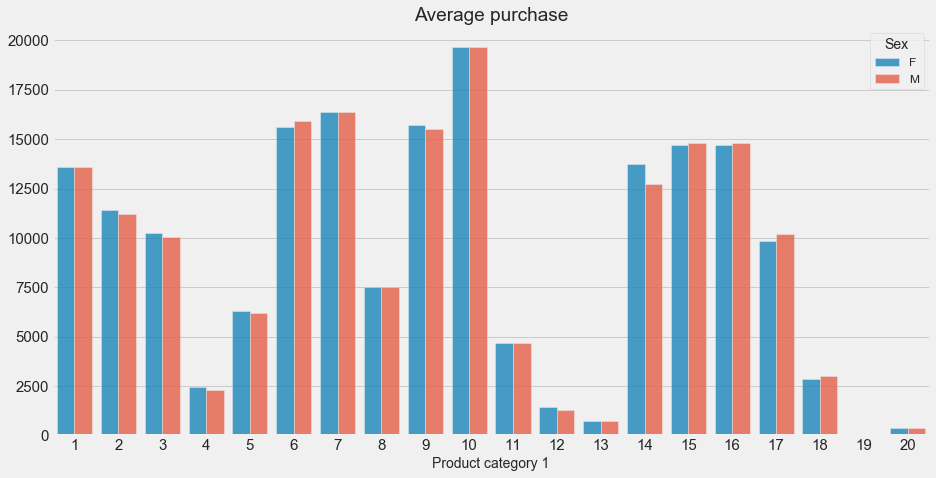

In [40]:
plt.figure(figsize=(14, 7))
pc1_age_pch= data.groupby(['Product_Category_1', 'Gender']).agg({'Purchase':np.mean}).reset_index()
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=pc1_age_pch,alpha = 0.8)
plt.title('Average purchase',fontsize=19)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.legend(title='Sex',frameon=True,fontsize=12)
plt.tick_params(labelsize=15)

In [41]:
# it's obvious that product category number 10 has the highest avg purchase among all age groups and gender

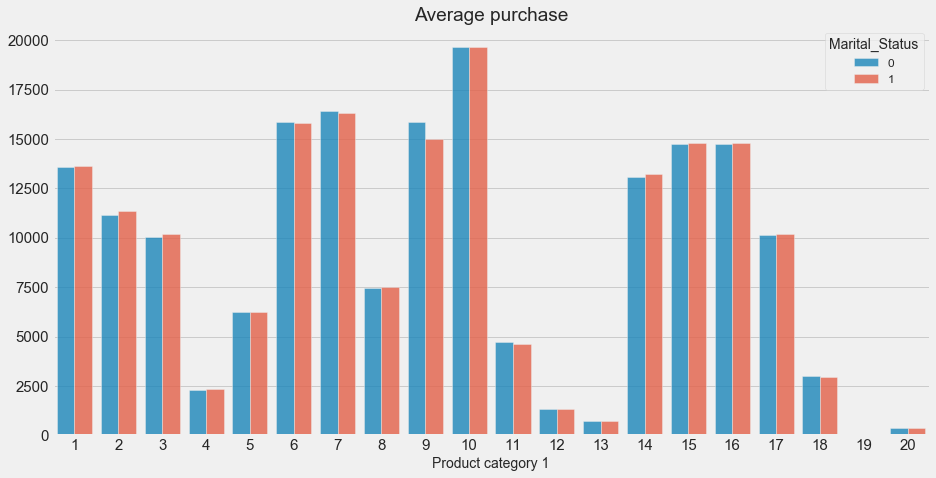

In [42]:
plt.figure(figsize=(14, 7))
pc1_age_pch= data.groupby(['Product_Category_1', 'Marital_Status']).agg({'Purchase':np.mean}).reset_index()
sns.barplot('Product_Category_1','Purchase',hue='Marital_Status',data=pc1_age_pch,alpha = 0.8)
plt.title('Average purchase',fontsize=19)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.legend(title='Marital_Status',frameon=True,fontsize=12)
plt.tick_params(labelsize=15)

In [43]:
# no interesting insight can be inferred from above plots since pattenrs are the same for different age groups, 
# sex, and marital status

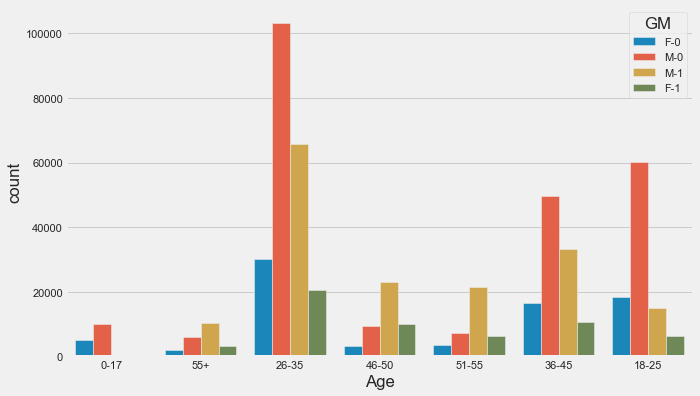

In [44]:
# it's been inferred that more men did shopping on Blackfriday which is a bit strange based on general experience, one reason
# might be that part of those married men paid for the stuff their spouse/wife has purchased, we can investigate that

# also we can investigate if there is a significant difference in purchase pattern between different age groups based on their
# gender nad marital status

data['GM']= data.apply(lambda x: '%s-%s' %(x['Gender'], x['Marital_Status']), axis=1)
plt.figure(figsize=(10, 6))
sns.countplot(data['Age'], hue=data['GM'])
plt.show()

In [45]:
#there is no married category for 0-17 that based on their age it makes sense, however for age groups of 46-55 married men paid
# significantly more than married women which supports our previous assumption, for other goups single men paid more though,
# if we had a clear history of purchased products we could investigate these patterns more deeply.

In [49]:
data.columns=['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3','GM', 'Purchase']

In [55]:
label=LabelEncoder()
lab_lst=data.columns[1:12]
for feature in lab_lst:
    data[feature]=data[feature].astype(str)
    data[feature+'_lab']=label.fit_transform(data[feature])

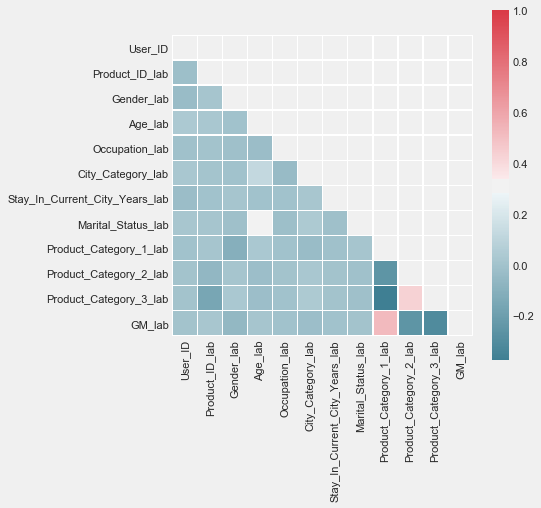

In [57]:
plt.figure(1, figsize=(6,6))
corr_matrix=data.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix,mask=mask, 
            square=True, linewidths=.5, annot=False, cmap=cmap)
plt.show()

In [58]:
# and eventually, it can be inferred that there is no high correlation among dataset features

# Imputing Missing Values

In [331]:
train=train_org.copy()
test=test_org.copy()

In [332]:
train=train.fillna(0)
test=test.fillna(0)

## Label encoding

In [333]:
gender_map = {'F':0, 'M':1}
age_map = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
city_map = {'A':0, 'B':1, 'C':2}
stay_map = {'0':0, '1':1, '2':2, '3':3, '4+':4}

In [334]:
def label(frame, feature, mapping):
    frame[feature]= frame[feature].map(mapping)

dic={'Gender': gender_map, 'Age': age_map, 'City_Category': city_map, 'Stay_In_Current_City_Years': stay_map}

for key, value in dic.items():
    label(train, key, value)
    label(test, key, value)
    

# Feature Engineering
## Feature Creation

In [335]:
# Since there was no significant correlation between available features, it might be a good idea to create some new features

### Counting Each feature

In [336]:
def count(feature):    
    train[feature+"_Count"] = train.groupby([feature])[feature].transform('count')
    test[feature+"_Count"]= test.groupby([feature])[feature].transform('count')
    test[feature+"_Count"]= test[feature+"_Count"].fillna(0)

In [337]:
lst=['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years','Product_Category_1',
       'Product_Category_2', 'Product_Category_3']

for feature in lst:
    count(feature)

In [338]:
lst=['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']
for feature in lst:
    train[feature]=train[feature].astype(str)
    test[feature]=test[feature].astype(str)

In [339]:
lab_lst=['User_ID', 'Product_ID']

for feature in lab_lst:
    label=LabelEncoder()
    full_data = pd.concat((train[feature],test[feature]),axis=0).astype('str')
    temp = label.fit_transform(np.array(full_data))
    train[feature] = label.transform(np.array( train[feature] ).astype('str'))
    test[feature] = label.transform(np.array( test[feature] ).astype('str'))

In [340]:
def combi(feature1, feature2):
    train["Combi"+"_"+feature1+'_'+feature2]=train[feature1].astype(str)+'_'+train[feature2].astype(str)
    test["Combi"+"_"+feature1+'_'+feature2]=test[feature1].astype(str)+'_'+test[feature2].astype(str)

In [341]:
combi('Gender', 'Marital_Status')
combi('Gender', 'Age')
combi('Product_Category_1', 'Product_Category_2')
combi('Product_Category_1', 'Product_Category_3')
combi('Product_Category_2', 'Product_Category_3')
combi('Age', 'City_Category')
combi('Age', 'Marital_Status')
combi('Occupation', 'Gender')
combi('Stay_In_Current_City_Years', 'City_Category')
combi('Stay_In_Current_City_Years', 'Occupation')

In [342]:
hoe_lst=[f for f in train.columns if len(train[f].unique())< 10  and '_Count' not in f]
hoe_lst

['Gender',
 'Age',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Combi_Gender_Marital_Status']

In [343]:
hoe_lst_test=[f for f in test.columns if len(test[f].unique())< 10  and '_Count' not in f]
hoe_lst_test

['Gender',
 'Age',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Combi_Gender_Marital_Status']

In [344]:
hoe_features_train=pd.get_dummies(train[hoe_lst]) 
hoe_features_test=pd.get_dummies(test[hoe_lst]) 

In [347]:
lab_lst_2= [f for f in train.columns if len(train[f].unique())> 10  and f not in ['User_ID', 'Product_ID', 'Purchase'] 
            and '_Count' not in f]
lab_lst_2

['Occupation',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Combi_Gender_Age',
 'Combi_Product_Category_1_Product_Category_2',
 'Combi_Product_Category_1_Product_Category_3',
 'Combi_Product_Category_2_Product_Category_3',
 'Combi_Age_City_Category',
 'Combi_Age_Marital_Status',
 'Combi_Occupation_Gender',
 'Combi_Stay_In_Current_City_Years_City_Category',
 'Combi_Stay_In_Current_City_Years_Occupation']

In [348]:
for feature in lab_lst_2:
    label=LabelEncoder()
    full_data = pd.concat((train[feature],test[feature]),axis=0).astype('str')
    temp = label.fit_transform(np.array(full_data))
    train[feature] = label.transform(np.array( train[feature] ).astype('str'))
    test[feature] = label.transform(np.array( test[feature] ).astype('str'))

In [349]:
train_org.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [350]:
lst=['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']
for feature in lst:
    train[feature]=train[feature].astype(float)
    test[feature]=test[feature].astype(float)
    train[feature]=train[feature].astype(int)
    test[feature]=test[feature].astype(int)
train['Age_ProID_AVG']=train.groupby('Product_ID')['Age'].transform('mean')
test['Age_ProID_AVG']=test.groupby('Product_ID')['Age'].transform('mean')
train['Gen_ProID_AVG']=train.groupby('Product_ID')['Gender'].transform('mean')
test['Gen_ProID_AVG']=test.groupby('Product_ID')['Gender'].transform('mean')
train['City_ProID_AVG']=train.groupby('Product_ID')['City_Category'].transform('mean')
test['City_ProID_AVG']=test.groupby('Product_ID')['City_Category'].transform('mean')
train['Stay_ProID_AVG']=train.groupby('Product_ID')['Stay_In_Current_City_Years'].transform('mean')
test['Stay_ProID_AVG']=test.groupby('Product_ID')['Stay_In_Current_City_Years'].transform('mean')
train['Marital_ProID_AVG']=train.groupby('Product_ID')['Marital_Status'].transform('mean')
test['Marital_ProID_AVG']=test.groupby('Product_ID')['Marital_Status'].transform('mean')
train['Occ_ProID_AVG']=train.groupby('Product_ID')['Occupation'].transform('mean')
test['Occ_ProID_AVG']=test.groupby('Product_ID')['Occupation'].transform('mean')
train['Cat1_UsrID_AVG']=train.groupby('User_ID')['Product_Category_1'].transform('mean')
test['Cat1_UsrID_AVG']=test.groupby('User_ID')['Product_Category_1'].transform('mean')
train['Cat2_UsrID_AVG']=train.groupby('User_ID')['Product_Category_2'].transform('mean')
test['Cat2_UsrID_AVG']=test.groupby('User_ID')['Product_Category_2'].transform('mean')
train['Cat3_UsrID_AVG']=train.groupby('User_ID')['Product_Category_3'].transform('mean')
test['Cat3_UsrID_AVG']=test.groupby('User_ID')['Product_Category_3'].transform('mean')

for feature in lst:
    train[feature]=train[feature].astype(str)
    test[feature]=test[feature].astype(str)

In [351]:
train.drop(hoe_lst, axis=1, inplace=True)
train=pd.concat([train, hoe_features_train], axis=1)
test.drop(hoe_lst, axis=1, inplace=True)
test=pd.concat([test, hoe_features_test], axis=1)

In [352]:
train.shape, test.shape

((550068, 58), (233599, 57))

In [353]:
AVG=[f for f in train.columns if '_AVG' in f]

In [354]:
train[AVG].head()

,Age_ProID_AVG,Gen_ProID_AVG,City_ProID_AVG,Stay_ProID_AVG,Marital_ProID_AVG,Occ_ProID_AVG,Cat1_UsrID_AVG,Cat2_UsrID_AVG,Cat3_UsrID_AVG
0,2.475771,0.735683,1.057269,1.797357,0.422907,8.303965,7.057143,3.685714,3.285714
1,2.277108,0.760757,1.082616,1.846816,0.407917,8.839931,7.057143,3.685714,3.285714
2,3.284314,0.470588,1.107843,1.960784,0.529412,8.666667,7.057143,3.685714,3.285714
3,2.944282,0.524927,1.093842,1.777126,0.498534,8.521994,7.057143,3.685714,3.285714
4,3.295567,0.748768,1.142857,1.802956,0.487685,8.832512,5.142857,6.688312,3.649351


In [355]:
pd.set_option('display.max_columns', 500)
train.head()

,User_ID,Product_ID,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID_Count,Product_ID_Count,Gender_Count,Age_Count,Occupation_Count,City_Category_Count,Stay_In_Current_City_Years_Count,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Combi_Gender_Age,Combi_Product_Category_1_Product_Category_2,Combi_Product_Category_1_Product_Category_3,Combi_Product_Category_2_Product_Category_3,Combi_Age_City_Category,Combi_Age_Marital_Status,Combi_Occupation_Gender,Combi_Stay_In_Current_City_Years_City_Category,Combi_Stay_In_Current_City_Years_Occupation,Age_ProID_AVG,Gen_ProID_AVG,City_ProID_AVG,Stay_ProID_AVG,Marital_ProID_AVG,Occ_ProID_AVG,Cat1_UsrID_AVG,Cat2_UsrID_AVG,Cat3_UsrID_AVG,Gender_0,Gender_1,Age_0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,City_Category_0,City_Category_1,City_Category_2,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Marital_Status_0,Marital_Status_1,Combi_Gender_Marital_Status_0_0,Combi_Gender_Marital_Status_0_1,Combi_Gender_Marital_Status_1_0,Combi_Gender_Marital_Status_1_1
0,0,684,12,5,0,0,8370,35,227,135809,15102,12930,147720,101838,20213,173638,383247,0,57,42,0,0,0,2,6,44,2.475771,0.735683,1.057269,1.797357,0.422907,8.303965,7.057143,3.685714,3.285714,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
1,0,2406,12,0,6,11,15200,35,581,135809,15102,12930,147720,101838,140378,16466,18428,0,41,19,67,0,0,2,6,44,2.277108,0.760757,1.082616,1.846816,0.407917,8.839931,7.057143,3.685714,3.285714,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
2,0,868,12,13,0,0,1422,35,102,135809,15102,12930,147720,101838,3947,173638,383247,0,11,4,0,0,0,2,6,44,3.284314,0.470588,1.107843,1.960784,0.529412,8.666667,7.057143,3.685714,3.285714,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
3,0,844,12,13,13,0,1057,35,341,135809,15102,12930,147720,101838,3947,55108,383247,0,12,4,16,0,0,2,6,44,2.944282,0.524927,1.093842,1.777126,0.498534,8.521994,7.057143,3.685714,3.285714,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
4,1,2769,19,10,0,0,7969,77,203,414259,21504,25371,171175,84726,113925,173638,383247,13,94,73,0,20,11,15,14,91,3.295567,0.748768,1.142857,1.802956,0.487685,8.832512,5.142857,6.688312,3.649351,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0


In [356]:
lab_lst_3=[f for f in train.columns if 'Combi' in f and '_Gender_Marital' not in f]
lab_lst_3

['Combi_Gender_Age',
 'Combi_Product_Category_1_Product_Category_2',
 'Combi_Product_Category_1_Product_Category_3',
 'Combi_Product_Category_2_Product_Category_3',
 'Combi_Age_City_Category',
 'Combi_Age_Marital_Status',
 'Combi_Occupation_Gender',
 'Combi_Stay_In_Current_City_Years_City_Category',
 'Combi_Stay_In_Current_City_Years_Occupation']

In [357]:
for feature in lab_lst_3:
    label=LabelEncoder()
    full_data = pd.concat((train[feature],test[feature]),axis=0).astype('str')
    temp = label.fit_transform(np.array(full_data))
    train[feature] = label.transform(np.array( train[feature] ).astype('str'))
    test[feature] = label.transform(np.array( test[feature] ).astype('str'))

In [358]:
train.head()

,User_ID,Product_ID,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID_Count,Product_ID_Count,Gender_Count,Age_Count,Occupation_Count,City_Category_Count,Stay_In_Current_City_Years_Count,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Combi_Gender_Age,Combi_Product_Category_1_Product_Category_2,Combi_Product_Category_1_Product_Category_3,Combi_Product_Category_2_Product_Category_3,Combi_Age_City_Category,Combi_Age_Marital_Status,Combi_Occupation_Gender,Combi_Stay_In_Current_City_Years_City_Category,Combi_Stay_In_Current_City_Years_Occupation,Age_ProID_AVG,Gen_ProID_AVG,City_ProID_AVG,Stay_ProID_AVG,Marital_ProID_AVG,Occ_ProID_AVG,Cat1_UsrID_AVG,Cat2_UsrID_AVG,Cat3_UsrID_AVG,Gender_0,Gender_1,Age_0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,City_Category_0,City_Category_1,City_Category_2,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Marital_Status_0,Marital_Status_1,Combi_Gender_Marital_Status_0_0,Combi_Gender_Marital_Status_0_1,Combi_Gender_Marital_Status_1_0,Combi_Gender_Marital_Status_1_1
0,0,684,12,5,0,0,8370,35,227,135809,15102,12930,147720,101838,20213,173638,383247,0,60,37,0,0,0,12,11,43,2.475771,0.735683,1.057269,1.797357,0.422907,8.303965,7.057143,3.685714,3.285714,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
1,0,2406,12,0,6,11,15200,35,581,135809,15102,12930,147720,101838,140378,16466,18428,0,43,11,64,0,0,12,11,43,2.277108,0.760757,1.082616,1.846816,0.407917,8.839931,7.057143,3.685714,3.285714,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
2,0,868,12,13,0,0,1422,35,102,135809,15102,12930,147720,101838,3947,173638,383247,0,10,34,0,0,0,12,11,43,3.284314,0.470588,1.107843,1.960784,0.529412,8.666667,7.057143,3.685714,3.285714,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
3,0,844,12,13,13,0,1057,35,341,135809,15102,12930,147720,101838,3947,55108,383247,0,11,34,8,0,0,12,11,43,2.944282,0.524927,1.093842,1.777126,0.498534,8.521994,7.057143,3.685714,3.285714,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
4,1,2769,19,10,0,0,7969,77,203,414259,21504,25371,171175,84726,113925,173638,383247,5,101,71,0,13,3,7,6,95,3.295567,0.748768,1.142857,1.802956,0.487685,8.832512,5.142857,6.688312,3.649351,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0


## Treating Outliers

In [359]:
target= train['Purchase']
train.drop(['Purchase'], axis=1, inplace=True)

q1 = target.quantile(0.25)
q3 = target.quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
X = train[(target > fence_low) & (target < fence_high)]
y= target.loc[(target > fence_low) & (target < fence_high)]

## Normalization

In [360]:
X_org=X.copy()
test_org2=test.copy()
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
test = scaler.transform(test)

# Modeling

In [361]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [362]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
pred_y= rf.predict(X_test)


NameError: name 'Y_test' is not defined

In [364]:
mse = mean_squared_error(y_test, pred_y)
print("RMSE Error:", np.sqrt(mse))

RMSE Error: 2573.729715876654


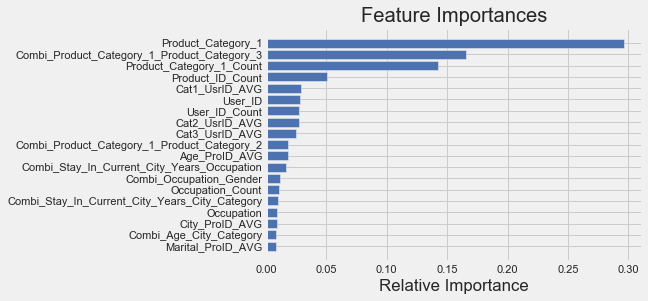

In [367]:
features= X_org.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[-19:]  # top 20 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [393]:
X=pd.DataFrame(X, columns=features)
test=pd.DataFrame(test, columns=features)

In [379]:
lst2=[f for f in features if 'Combi' in f]
lst3=[f for f in features if '_AVG' in f or '_Count' in f]
lst1=[f for f in features if f not in lst2 and f not in lst3]
len(lst1)+len(lst2)+len(lst3)==len(features)

True

## I'll continue Modeling with two XGB algotithms, each with different features:
### I am going to feed lst1+lst2 to first model and lst1+lst3 to second model

## Hyper Parameter Optimazion

### First XGB algorithm

### Fixing learning rate and number of estimators for tuning tree-based parameters

In [381]:
def modelfit(alg, dtrain, dtest, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        xgtest = xgb.DMatrix(dtest[predictors].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='rmse', early_stopping_rounds=early_stopping_rounds)
        return print('{} is the optimized n_estimator for specified learning rate'.format(cvresult.shape[0]))

In [388]:
predictors=lst1+lst2
train=X.copy()
train=pd.concat([train, target], axis=1)
target='Purchase'

In [397]:
xgb1=XGBRegressor(learning_rate =0.5,
 n_estimators=1000,
 max_depth=5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 seed=42)
modelfit(xgb1, train, test, predictors)

9 is the optimized n_estimator for specified learning rate


In [401]:
param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.5, n_estimators=9, max_depth=5,
                                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        seed=27), 
                       param_grid = param_test1, scoring='neg_root_mean_squared_error',iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    gamma=0, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.5, max_delta_step=None,
                                    max_depth=5, min_child_weight=1,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=9, n_jo...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    seed=27, subsample=0.8, tree_method=None,
                                    validate_parameters=None, verb

In [402]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 7, 'min_child_weight': 1}, -5005.782590403297)

#### 2nd attemp (optimizing by shirinking the range)

In [404]:
param_test2 = {
    'max_depth':[6,7,8],
    'min_child_weight':[1,2]
}
gsearch2 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.5, n_estimators=9, max_depth=7,
                                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        seed=27), 
                       param_grid = param_test2, scoring='neg_root_mean_squared_error',iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    gamma=0, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.5, max_delta_step=None,
                                    max_depth=7, min_child_weight=1,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=202, n_...
                                    objective='reg:squarederror',
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    seed=27, subsample=0.8, tree_method=None,


In [405]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 6, 'min_child_weight': 1}, -5173.130733803232)

## Tuning Gamma

In [408]:
param_test3={ 'gamma': [i/10.0 for i in range(0,5)]}

gsearch3 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.5, n_estimators=9, max_depth=7,
                                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        seed=27), 
                       param_grid = param_test3, scoring='neg_root_mean_squared_error',iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    gamma=0, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.5, max_delta_step=None,
                                    max_depth=7, min_child_weight=1,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=9, n_jo...
                                    objective='reg:squarederror',
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    seed=27, subsample=0.8, tree_method=None,


In [409]:
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.0}, -5005.782590403297)

## Tuning Subsample and Colsample_bytree

In [410]:
param_test4={ 'subsample': [i/10.0 for i in range (6, 10)], 
           'colsample_bytree': [i/10.0 for i in range (6, 10)] }

gsearch4 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.5, n_estimators=9, max_depth=7,
                                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        seed=27), 
                       param_grid = param_test4, scoring='neg_root_mean_squared_error',iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    gamma=0, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.5, max_delta_step=None,
                                    max_depth=7, min_child_weight=1,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=9, n_jo...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    seed=27, subsample=0.8, tree_method=None,
                                    validate_parameters=None, verb

In [411]:
gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 0.8, 'subsample': 0.8}, -5005.782590403297)

In [412]:
param_test5={ 'subsample': [i/100.0 for i in range (75, 90, 5)], 
           'colsample_bytree': [i/100.0 for i in range (75, 90, 5)] }

gsearch5 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.5, n_estimators=9, max_depth=7,
                                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        seed=27), 
                       param_grid = param_test5, scoring='neg_root_mean_squared_error',iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    gamma=0, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.5, max_delta_step=None,
                                    max_depth=7, min_child_weight=1,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=9, n_jo...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    seed=27, subsample=0.8, tree_method=None,
                                    validate_parameters=None, verb

In [413]:
gsearch5.best_params_, gsearch5.best_score_

({'colsample_bytree': 0.8, 'subsample': 0.8}, -5005.782590403297)

## Tuning Regularization Parameters
#### Alpha

In [414]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

gsearch6 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.5, n_estimators=9, max_depth=7,
                                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        seed=27), 
                       param_grid = param_test6, scoring='neg_root_mean_squared_error',iid=False, cv=5)
gsearch6.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    gamma=0, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.5, max_delta_step=None,
                                    max_depth=7, min_child_weight=1,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=9, n_jo...
                                    objective='reg:squarederror',
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    seed=27, subsample=0.8, tree_method=None,


In [415]:
gsearch6.best_params_, gsearch6.best_score_

({'reg_alpha': 100}, -4994.067377104789)

#### Lambda

In [419]:
param_test7 = {
 'reg_lambda':[0, 1e-5, 1e-3, 0.1, 1, 10, 100]
}

gsearch7 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.5, n_estimators=9, max_depth=7,
                                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        seed=27, reg_alpha=100), 
                       param_grid = param_test7, scoring='neg_root_mean_squared_error',iid=False, cv=5)
gsearch7.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    gamma=0, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.5, max_delta_step=None,
                                    max_depth=7, min_child_weight=1,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=9, n_jo...
                                    objective='reg:squarederror',
                                    random_state=None, reg_alpha=100,
                                    reg_lambda=None, scale_pos_weight=None,
                                    seed=27, subsample=0.8, tree_method=None,
 

In [420]:
gsearch7.best_params_, gsearch7.best_score_

({'reg_lambda': 1}, -4994.067377104789)

In [422]:
xgb1_optimized=XGBRegressor( learning_rate =0.1, n_estimators=120, max_depth=7,
                                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        seed=42, reg_alpha=100, reg_lambda=1)
modelfit(xgb1_optimized, train, test, predictors)

51 is the optimized n_estimator for specified learning rate


In [423]:
xgb_final=XGBRegressor( learning_rate =0.1, n_estimators=51, max_depth=7,
                                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        seed=42, reg_alpha=100, reg_lambda=1)

In [424]:
X_train,X_test,y_train,y_test = train_test_split(train[predictors],train[target],test_size=0.2,random_state=42)
xgb_final.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=51, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=100,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [450]:
train=X.copy()
X_train,X_test,y_train,y_test = train_test_split(train[predictors],y,test_size=0.2,random_state=42)
y_pred= xgb_final.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

RMSE Error: 4933.981336020089


In [451]:
xgb_final.fit(train[predictors], y)


AttributeError: module 'xgboost' has no attribute 'predict'

In [454]:
pred=pd.DataFrame(xgb_final.predict(test[predictors]))

In [458]:
submission=pd.read_csv('sample_submission.csv')
submission

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842
...,...,...,...
233594,100,1006036,P00118942
233595,100,1006036,P00254642
233596,100,1006036,P00031842
233597,100,1006037,P00124742


In [459]:
submission=submission.drop(['Purchase'], axis=1)
submission=pd.concat([pred, submission], axis=1)
submission.columns=(['Purchase', 'User_ID', 'Product_ID'])
submission.head()

,Purchase,User_ID,Product_ID
0,15878.493164,1000004,P00128942
1,11370.928711,1000009,P00113442
2,6254.896973,1000010,P00288442
3,2508.548584,1000010,P00145342
4,2577.416260,1000011,P00053842


In [460]:
submission.to_csv('modified_submission.csv', index=False)

In [461]:
rf.fit(train, y)

NameError: name 'fr' is not defined

In [463]:
pred_rf=rf.predict(test)


TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [464]:
pred_rf=pd.DataFrame(pred_rf)
submission=pd.read_csv('sample_submission.csv')
submission=submission.drop(['Purchase'], axis=1)
submission=pd.concat([pred_rf, submission], axis=1)
submission.columns=(['Purchase', 'User_ID', 'Product_ID'])
submission.head()

,Purchase,User_ID,Product_ID
0,13827.65,1000004,P00128942
1,1939.27,1000009,P00113442
2,6394.68,1000010,P00288442
3,2237.60,1000010,P00145342
4,1682.78,1000011,P00053842


In [465]:
submission.to_csv('rf_submission.csv', index=False)